In [21]:
import os
import pandas as pd

In [22]:
data_dir = "../../data/dataset/"
subjects = os.listdir(data_dir)
gestures = ["Fist", "Palm"]

In [23]:
dataset = pd.DataFrame()

for subject in subjects:
    for gesture in gestures:
        gesture_dir = os.path.join(data_dir, subject, gesture)
        recordings = os.listdir(gesture_dir)
        for recording in recordings:
            file_path = os.path.join(gesture_dir, recording)
            data = pd.read_csv(file_path)

            # ... calculating distance of the index finger
            data["drf1"] = ((data["rf1x"] - data["rpx"]).pow(2) + \
                    (data["rf1y"] - data["rpy"]).pow(2) + \
                    (data["rf1z"] - data["rpz"]).pow(2)).pow(0.5)

            # ... calculating distance of the middle finger
            data["drf2"] = ((data["rf2x"] - data["rpx"]).pow(2) + \
                    (data["rf2y"] - data["rpy"]).pow(2) + \
                    (data["rf2z"] - data["rpz"]).pow(2)).pow(0.5)

            # ... normalization
            # data = (data - data.min()) / (data.max() - data.min())

            data["label"] = gestures.index(gesture)

            dataset = pd.concat([dataset, data])

dataset.reset_index(inplace=True)
dataset

,index,time,rpx,rpy,rpz,lpx,lpy,lpz,rf0x,rf0y,...,lf2z,lf3x,lf3y,lf3z,lf4x,lf4y,lf4z,drf1,drf2,label
0,0,0,0.0000,0.000,0.0000,0,0,0,0.0000,0.000,...,0,0,0,0,0,0,0,0.000000,0.000000,0
1,1,1653947463571718,52.7881,279.247,51.8487,0,0,0,26.5439,266.208,...,0,0,0,0,0,0,0,49.401007,51.775339,0
2,2,1653947463580339,51.2337,282.385,50.5969,0,0,0,24.8537,269.085,...,0,0,0,0,0,0,0,49.391688,51.747844,0
3,3,1653947463589017,49.7976,284.936,49.5816,0,0,0,23.3565,271.254,...,0,0,0,0,0,0,0,49.360793,51.718260,0
4,4,1653947463597657,48.5748,287.010,48.4472,0,0,0,21.9935,272.822,...,0,0,0,0,0,0,0,49.353838,51.690813,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7944,563,1653947502349205,64.7411,230.489,52.9700,0,0,0,-17.7218,238.354,...,0,0,0,0,0,0,0,105.187063,110.751520,1
7945,564,1653947502357821,63.2953,230.013,52.6912,0,0,0,-19.3998,237.998,...,0,0,0,0,0,0,0,105.194597,110.740697,1
7946,565,1653947502366483,61.9121,229.642,52.2982,0,0,0,-20.9938,237.492,...,0,0,0,0,0,0,0,105.203431,110.727498,1
7947,566,1653947502375175,60.3841,229.103,51.8894,0,0,0,-22.7013,237.042,...,0,0,0,0,0,0,0,105.215642,110.714621,1


In [24]:
features = dataset[["drf1", "drf2", "label"]]
features

,drf1,drf2,label
0,0.000000,0.000000,0
1,49.401007,51.775339,0
2,49.391688,51.747844,0
3,49.360793,51.718260,0
4,49.353838,51.690813,0
...,...,...,...
7944,105.187063,110.751520,1
7945,105.194597,110.740697,1
7946,105.203431,110.727498,1
7947,105.215642,110.714621,1


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [26]:
X = features.drop(columns=["label"]).to_numpy()
y = features["label"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [27]:
clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [28]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1329
           1       1.00      1.00      1.00      1295

    accuracy                           1.00      2624
   macro avg       1.00      1.00      1.00      2624
weighted avg       1.00      1.00      1.00      2624



In [29]:
import joblib
joblib.dump(clf, "../../model/knn-clf.joblib")

['../../model/knn-clf.joblib']

<AxesSubplot:>

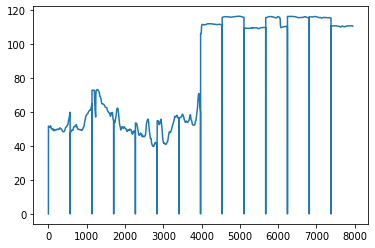

In [30]:
features["drf2"].plot()